# Підготовка даних

In [21]:
# Підключення до диску і налаштування ноутбука
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Отримання шляхів до файлів і сортування
import os
from natsort import natsorted

data_dir = '/content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw08_data/data/'

folders = [name for name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, name))]

file_paths_by_folder = {}

for folder in folders:
    full_dir = os.path.join(data_dir, folder)

    file_paths = [os.path.join(full_dir, name) for name in os.listdir(full_dir) if os.path.isfile(os.path.join(full_dir, name))]

    file_paths_by_folder[folder] = natsorted(file_paths)

for folder, file_paths in file_paths_by_folder.items():
    print(f"Папка: {folder} - {len(file_paths)} : {file_paths[0]} і тд")

Папка: idle - 1039 : /content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw08_data/data/idle/idle-1.csv і тд
Папка: stairs - 165 : /content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw08_data/data/stairs/stairs-1.csv і тд
Папка: running - 3408 : /content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw08_data/data/running/running-1.csv і тд
Папка: walking - 1850 : /content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw08_data/data/walking/walking-1.csv і тд


In [31]:
# Створення Data Frame
from scipy.fft import fft
import numpy as np

def get_frequency_features(data):
    N = len(data)
    freqs = fft(data)
    magnitude = np.abs(freqs)[:N//2]
    return magnitude.mean(), magnitude.max()

data = []

for folder, files in file_paths_by_folder.items():
  for file in files:
    df = pd.read_csv(file)

    row = {
    'mean_x': df['accelerometer_X'].mean(),
    'mean_y': df['accelerometer_Y'].mean(),
    'mean_z': df['accelerometer_Z'].mean(),
    'std_x': df['accelerometer_X'].std(),
    'std_y': df['accelerometer_Y'].std(),
    'std_z': df['accelerometer_Z'].std(),
    'min_x': df['accelerometer_X'].min(),
    'min_y': df['accelerometer_Y'].min(),
    'min_z': df['accelerometer_Z'].min(),
    'max_x': df['accelerometer_X'].max(),
    'max_y': df['accelerometer_Y'].max(),
    'max_z': df['accelerometer_Z'].max(),
    'norm_energy_x': (df['accelerometer_X']**2).sum() / len(df),
    'norm_energy_y': (df['accelerometer_Y']**2).sum() / len(df),
    'norm_energy_z': (df['accelerometer_Z']**2).sum() / len(df),
    'label': folder
    }
    data.append(row)

df = pd.DataFrame(data)

print(df.head(15))

      mean_x    mean_y    mean_z     std_x     std_y     std_z     min_x     min_y     min_z     max_x     max_y     max_z  norm_energy_x  norm_energy_y  norm_energy_z label
0   0.178448  0.167435  9.605697  1.036361  1.157603  0.406903 -0.909797 -0.282516  8.418014  5.099650  4.616021  9.806650       1.070086       1.323412      92.429464  idle
1   0.113166 -0.135352  9.690771  1.020992  0.075092  0.278368 -0.909797 -0.282516  8.418014  5.099650  0.148441  9.806650       1.020484       0.023771      93.985945  idle
2  -0.034636 -0.139343  9.755414  0.360760  0.045866  0.098319 -0.320823 -0.244209  9.251195  1.762132  0.023942  9.806650       0.127009       0.021450      95.177452  idle
3  -0.098960 -0.137587  9.772653  0.122677  0.045738  0.024330 -0.320823 -0.244209  9.667787  0.407014  0.023942  9.806650       0.024341       0.020952      95.505310  idle
4  -0.098322 -0.134075  9.771216  0.124077  0.046731  0.025356 -0.320823 -0.244209  9.667787  0.407014  0.023942  9.806650       0

In [33]:
# Збереження
df.to_csv('/content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw08_data/processed_data.csv', index=False)

# Навчання і оцінка моделей

In [36]:
# Завантаження
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv('/content/drive/My Drive/GOIT/DATA SCIENCE/goit-ds-hw08_data/processed_data.csv')
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_x         6462 non-null   float64
 1   mean_y         6462 non-null   float64
 2   mean_z         6462 non-null   float64
 3   std_x          6462 non-null   float64
 4   std_y          6462 non-null   float64
 5   std_z          6462 non-null   float64
 6   min_x          6462 non-null   float64
 7   min_y          6462 non-null   float64
 8   min_z          6462 non-null   float64
 9   max_x          6462 non-null   float64
 10  max_y          6462 non-null   float64
 11  max_z          6462 non-null   float64
 12  norm_energy_x  6462 non-null   float64
 13  norm_energy_y  6462 non-null   float64
 14  norm_energy_z  6462 non-null   float64
 15  label      

In [41]:
# Нормалізація
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = df.columns[:-1]

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df.head(15))

      mean_x    mean_y    mean_z     std_x     std_y     std_z     min_x     min_y     min_z     max_x     max_y     max_z  norm_energy_x  norm_energy_y  norm_energy_z label
0   0.363648  0.492856  0.964105  0.064118  0.057738  0.029552  0.952915  0.852660  0.972894  0.141979  0.205721  0.232904       0.002744       0.002940       0.502923  idle
1   0.360438  0.481183  0.970099  0.063157  0.003234  0.019935  0.952915  0.852660  0.972894  0.141979  0.103080  0.232904       0.002616       0.000052       0.511882  idle
2   0.353170  0.481029  0.974653  0.021839  0.001762  0.006464  0.967577  0.853500  0.989921  0.057973  0.100220  0.232904       0.000307       0.000047       0.518740  idle
3   0.350007  0.481097  0.975868  0.006940  0.001756  0.000928  0.967577  0.853500  0.998434  0.023864  0.100220  0.232904       0.000041       0.000046       0.520627  idle
4   0.350038  0.481232  0.975767  0.007028  0.001806  0.001005  0.967577  0.853500  0.998434  0.023864  0.100220  0.232904       0

In [42]:
# Розбиття і навчання на усіх фічах
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
# Розбиття і навчання на базових фічах

X1 = df.drop(columns=['std_x','std_y','std_z','norm_energy_x','norm_energy_y','norm_energy_z','label'])
y1 = df['label']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

svm_model1 = SVC()
svm_model1.fit(X_train1, y_train1)

rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train1, y_train1)

RandomForestClassifier()

In [52]:
# Розбиття і навчання на зубожілих фічах

X2 = df.drop(columns=['std_x','std_y','std_z','norm_energy_x','norm_energy_y','norm_energy_z','label','min_x','min_y','min_z','max_x','max_y','max_z'])
y2 = df['label']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

svm_model2 = SVC()
svm_model2.fit(X_train2, y_train2)

rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train2, y_train2)

RandomForestClassifier()

In [53]:
# Оцінка
from sklearn.metrics import classification_report

y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

y_pred_svm1 = svm_model1.predict(X_test1)
y_pred_rf1 = rf_model1.predict(X_test1)

y_pred_svm2 = svm_model2.predict(X_test2)
y_pred_rf2 = rf_model2.predict(X_test2)

print("SVM Results (full data):")
print(classification_report(y_test, y_pred_svm))

print("SVM Results (only simple data):")
print(classification_report(y_test1, y_pred_svm1))

print("SVM Results (poor data):")
print(classification_report(y_test2, y_pred_svm2))


print("Random Forest Results (full data):")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Results (only simple data):")
print(classification_report(y_test1, y_pred_rf1))

print("Random Forest Results (poor data):")
print(classification_report(y_test2, y_pred_rf2))

SVM Results (full data):
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       681
      stairs       0.93      0.66      0.77        38
     walking       0.96      0.99      0.98       354

    accuracy                           0.99      1293
   macro avg       0.97      0.91      0.94      1293
weighted avg       0.99      0.99      0.99      1293

SVM Results (only simple data):
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       220
     running       1.00      1.00      1.00       681
      stairs       0.93      0.66      0.77        38
     walking       0.96      0.99      0.98       354

    accuracy                           0.99      1293
   macro avg       0.97      0.91      0.94      1293
weighted avg       0.99      0.99      0.99      1293

SVM Results (poor data):
              precision    recall  f1-score   su

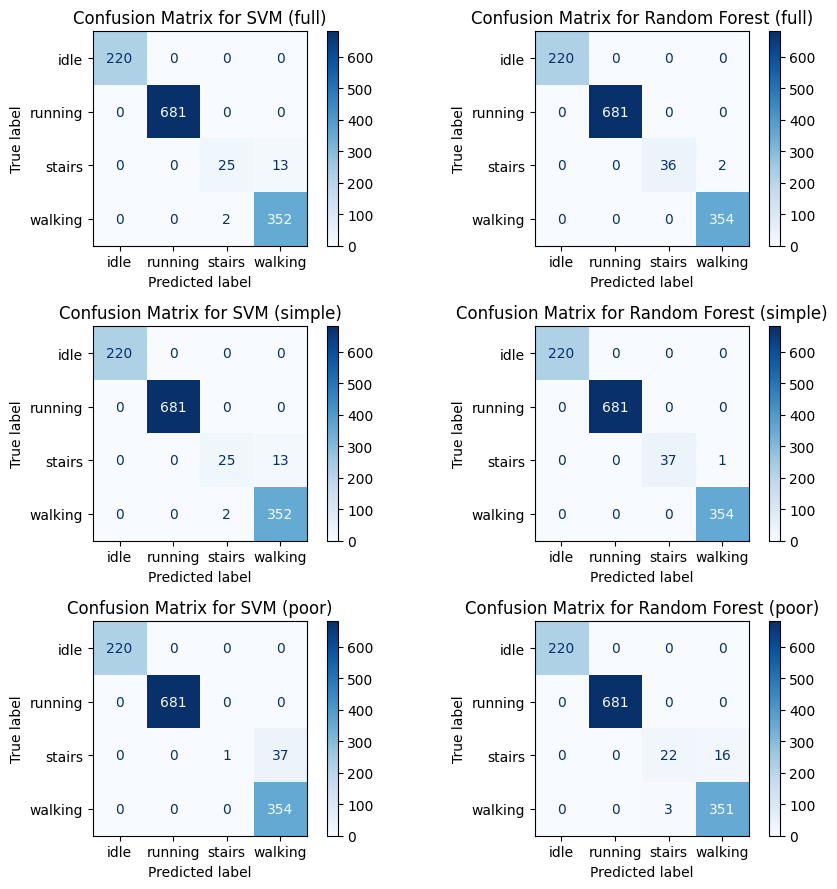

In [63]:
# Візуалізація матриць плутанини для графічної демонстрації порівняння
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, model_name, class_names, ax):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    disp.plot(cmap=plt.cm.Blues, values_format='.0f', ax=ax)
    ax.set_title(f"Confusion Matrix for {model_name}")

class_names = sorted(df['label'].unique())

fig, axes = plt.subplots(3, 2, figsize=(9, 9))

plot_confusion_matrix(y_test, y_pred_svm, "SVM (full)", class_names, axes[0, 0])
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest (full)", class_names, axes[0, 1])

plot_confusion_matrix(y_test1, y_pred_svm1, "SVM (simple)", class_names, axes[1, 0])
plot_confusion_matrix(y_test1, y_pred_rf1, "Random Forest (simple)", class_names, axes[1, 1])

plot_confusion_matrix(y_test2, y_pred_svm2, "SVM (poor)", class_names, axes[2, 0])
plot_confusion_matrix(y_test2, y_pred_rf2, "Random Forest (poor)", class_names, axes[2, 1])

plt.tight_layout()
plt.show()